<a href="https://colab.research.google.com/github/jrmaza/machine-learning/blob/main/molecular_fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generación de molecular fingerprints con RDKit
Un molecular fingerprints es un descriptor molecular que codifica carcterísticas moleculares en sistema binario (0 o 1), almacenados como bits. Un bit está ON (1) u OFF (0) cuando cierto fragmento de la molécula se encuentra en la estructura.

![](https://www.researchgate.net/profile/Kaue-Santana/publication/351153595/figure/fig1/AS:1017897795190784@1619697154386/A-Schematic-representation-of-bits-applied-in-the-molecular-fingerprints-of-chemical.png)


## Aplicaciones de los fingerprints
- Búsqueda de sub-estructuras y similitudes entre caracterísitcas de moléculas 
- Aprendizaje automatizado

## Cuáles son los estándares de los fingerprints

- Molecular Access System keys MACCS
- Avalon
- Atom-pair
- Topological-Torsion
- Morgan
- RDKit



In [1]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 20.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

## Moléculas de Referencia

https://www.sciencedirect.com/science/article/pii/S2451929420300851

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jrmaza/datasets/main/Orbital_Energies_input_data.csv')
dataset.head(10)

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808
5,OC(C=C)C=C,210.979194
6,O=N(=O)c1ccc(Cl)c(c1)N(=O)=O,168.833179
7,O=CC1CCCCC1,213.451579
8,COc1ccc(cc1)C#C,171.191985
9,Brc1cncnc1,188.344944


In [4]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset,'SMILES', 'Structure')

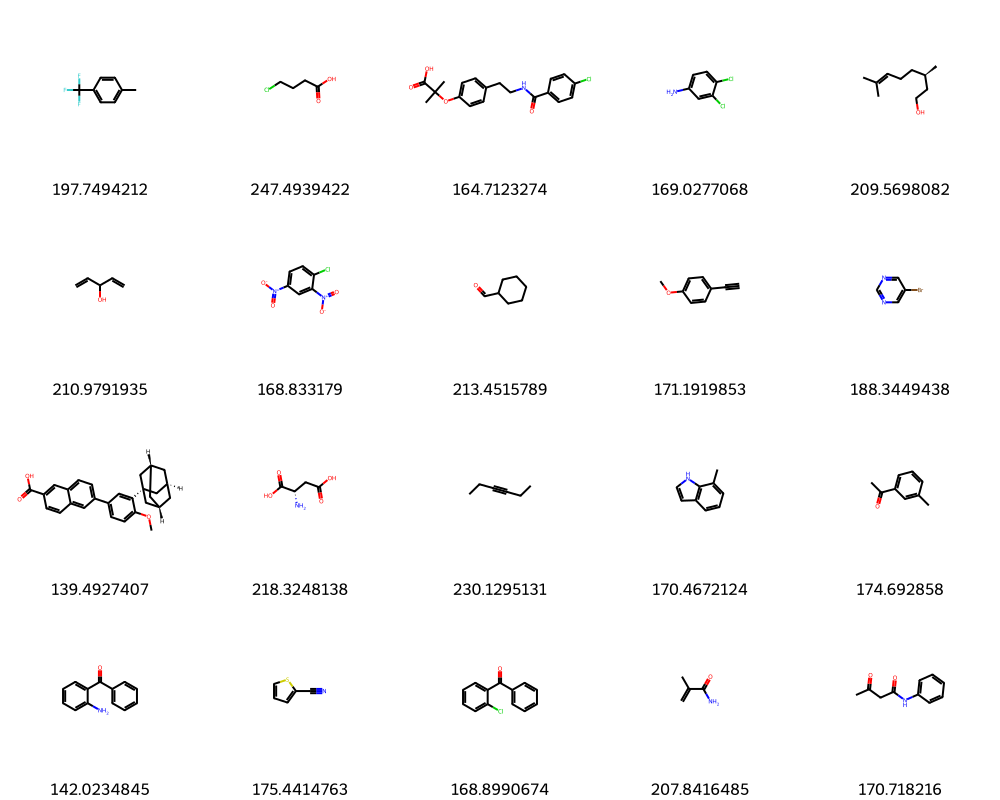

In [8]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset["Structure"]][:20], maxMols=100, 
                     legends=[str(x) for x in dataset.Energygap], subImgSize=(200,200), molsPerRow=5)

## MACCS keys

```from rdkit.Chem import MACCSkeys```

```Mkeys = MACCSkeys.GenMACCSKeys(dataset.Structure[0])```

```print(np.array(Mkeys))```





In [9]:
from rdkit.Chem import MACCSkeys

In [10]:
Mkeys = MACCSkeys.GenMACCSKeys(dataset.Structure[0])

In [ ]:
print(np.array(Mkeys))

In [ ]:
# print On bits
print("Index of On bits:",tuple(Mkeys.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(Mkeys.GetOnBits()))

# Avalon Fingerprint 

In [ ]:
from rdkit.Avalon import pyAvalonTools
Av = pyAvalonTools.GetAvalonFP(dataset.Structure[0], nBits=512)
print(np.array(Av))

In [ ]:
# print On bits
print("Index of On bits:",tuple(Av.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(Av.GetOnBits()))

# Atom-Pair Fingerprint

In [ ]:
from rdkit.Chem import rdMolDescriptors
AP = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(dataset.Structure[0], nBits=512)
print(np.array(AP))

# Morgan circular Fingerprint 

Referencia a RDKit https://rdkit.blogspot.com/2018/10/using-new-fingerprint-bit-rendering-code.html

In [ ]:
onbits = {}
mf = AllChem.GetMorganFingerprintAsBitVect(dataset.Structure[0], 2, nBits=512, bitInfo=onbits)
print(np.array(mf))

In [ ]:
# print On bits
print("Index of On bits:",tuple(mf.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(mf.GetOnBits()))

In [ ]:
Draw.DrawMorganBit(dataset.Structure[0], 129, onbits)

In [ ]:
# Render all the fragments or features that are responsible for making ON bits
all_fragments = [(dataset.Structure[0], x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

# Similitud Molecular
El coeficiente de Tanimoto (Jaccard) es el número de elementos en la intersección de doso conjuntos de moléculas divividas por los elementos de la unión.

![](https://raw.githubusercontent.com/gashawmg/Molecular-fingerprints/8dceadc1a24c966411e658d04376e0c6a9da3e06//tanimoto.JPG)



In [ ]:
DataStructs.FingerprintSimilarity(MOL01, MOL)@, metric=DataStructs.TanimotoSimilarity)